In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
%matplotlib inline

In [2]:
df=pd.read_csv('spam.csv', encoding='latin')

In [3]:
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

C:\Users\Anubha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

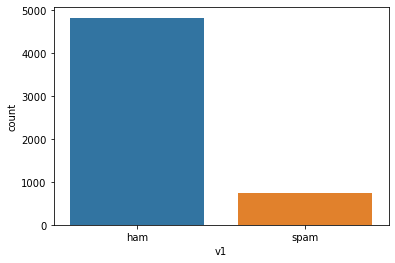

In [13]:
sns.countplot(df['v1'])

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Splitting the Data into independent and independent features
X = df['v2']
y = df['v1']

In [16]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [17]:
X.shape

(5572,)

In [18]:
le = LabelEncoder()

In [19]:
y = le.fit_transform(y)

In [20]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
y=y.reshape(-1,1)

In [22]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [23]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457, 1)
(1115, 1)


In [25]:
df.shape

(5572, 2)

In [26]:
#Preprocessing the Data as in NLP
# 1. Tokenize the Data
# 2 . Convert them into vectors

In [27]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
#Converted the tokenized words into vectors
sequences= tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len) #removes the stopwords as well and 
#adds the first few columns and rows with zero

In [28]:
sequences_matrix

array([[  0,   0,   0, ...,  92,  20, 922],
       [  0,   0,   0, ...,   1, 543, 594],
       [  0,   0,   0, ..., 626,  12,  18],
       ...,
       [  0,   0,   0, ...,   2,  36, 110],
       [  0,   0,   0, ...,   2, 160,  46],
       [  0,   0,   0, ...,  30, 158, 142]])

In [29]:
#Defining the NN
def LSTM1():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='output_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [30]:
#Call the function
model = LSTM1()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 257   

In [36]:
#Compile
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [37]:
# Training the Neural Network or LSTM
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
28/28 [==============================] - 8s 208ms/step - loss: 0.3409 - accuracy: 0.8659 - val_loss: 0.1672 - val_accuracy: 0.9496
Epoch 2/10
28/28 [==============================] - 7s 247ms/step - loss: 0.1008 - accuracy: 0.9770 - val_loss: 0.0644 - val_accuracy: 0.9809


In [38]:
#preprocess the test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [39]:
acc = model.evaluate(test_sequences_matrix, y_test)

35/35 [==============================] - 1s 19ms/step - loss: 0.0700 - accuracy: 0.9794
